In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Data/Nolan Wu - athlete_events.csv')

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
df[df.isna()].sum()

ID        0.0
Name        0
Sex         0
Age       0.0
Height    0.0
Weight    0.0
Team        0
NOC         0
Games       0
Year      0.0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: object

In [ ]:
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

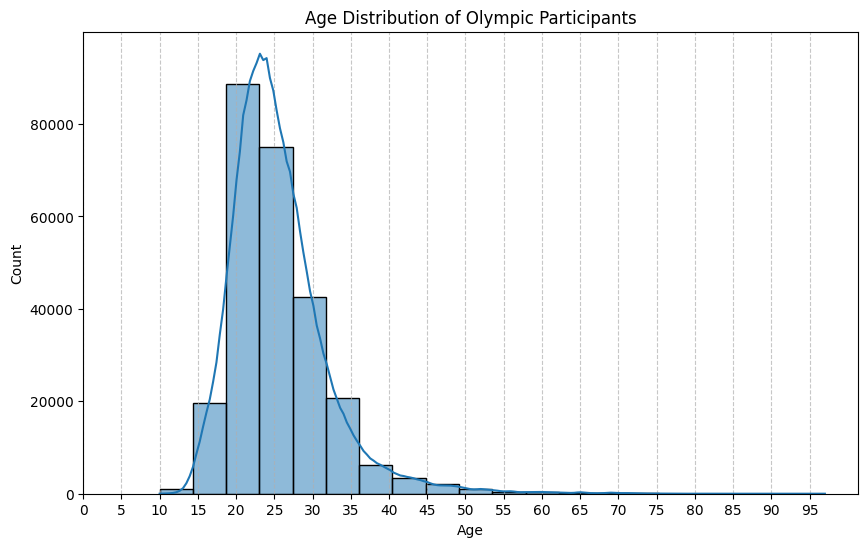

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)

plt.title('Age Distribution of Olympic Participants')
plt.xlabel('Age')
plt.ylabel('Count')

plt.xticks(range(0, 100, 5))
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


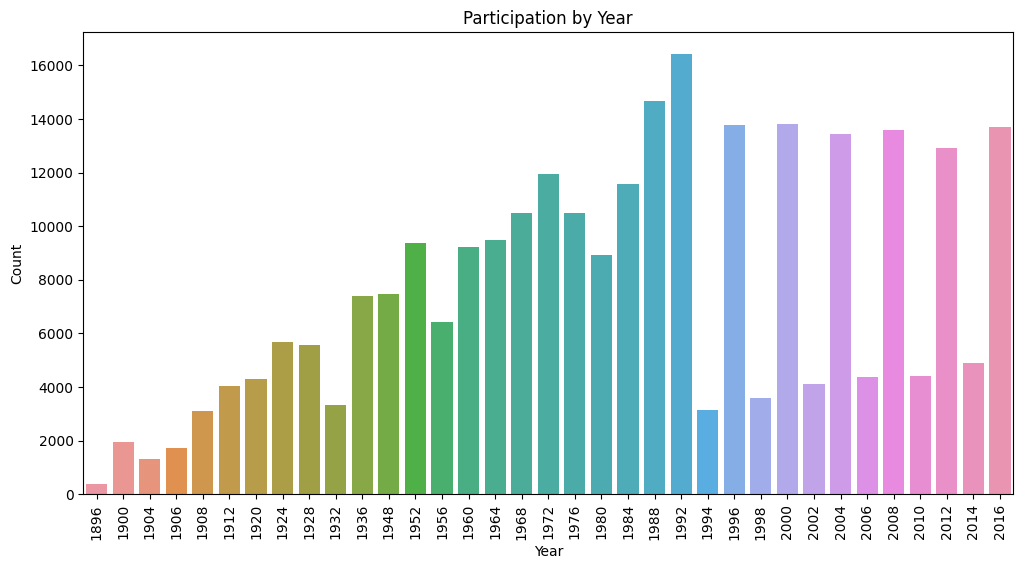

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year')
plt.title('Participation by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

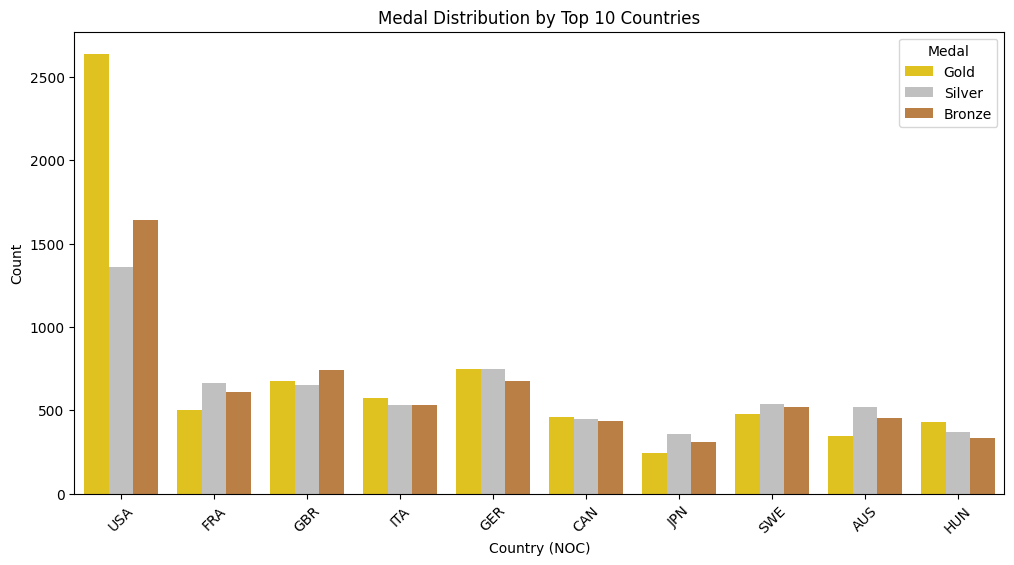

In [ ]:
top_countries = df['NOC'].value_counts().head(10).index
top_countries_df = df[df['NOC'].isin(top_countries)]


medal_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'}

plt.figure(figsize=(12, 6))
sns.countplot(data=top_countries_df, x='NOC', hue='Medal', order=top_countries, palette=medal_colors.values())

plt.title('Medal Distribution by Top 10 Countries')
plt.xlabel('Country (NOC)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Medal', loc='upper right', labels=medal_colors.keys())

plt.show()


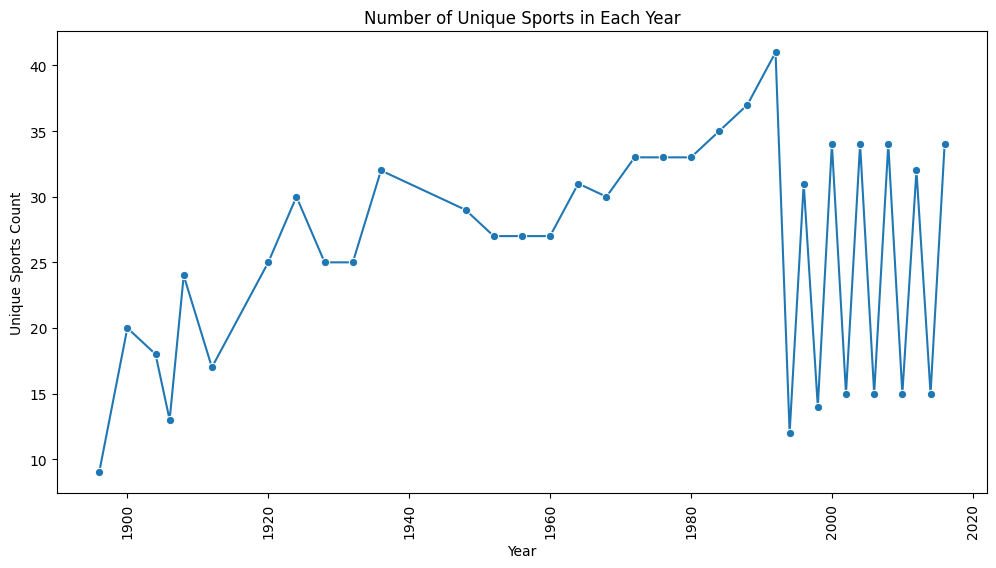

In [ ]:
unique_sports_per_year = df.groupby('Year')['Sport'].nunique().reset_index()
unique_sports_per_year.columns = ['Year', 'Unique_Sports']
plt.figure(figsize=(12, 6))
sns.lineplot(data=unique_sports_per_year, x='Year', y='Unique_Sports', marker='o')
plt.title('Number of Unique Sports in Each Year')
plt.xlabel('Year')
plt.ylabel('Unique Sports Count')
plt.xticks(rotation=90)
plt.show()

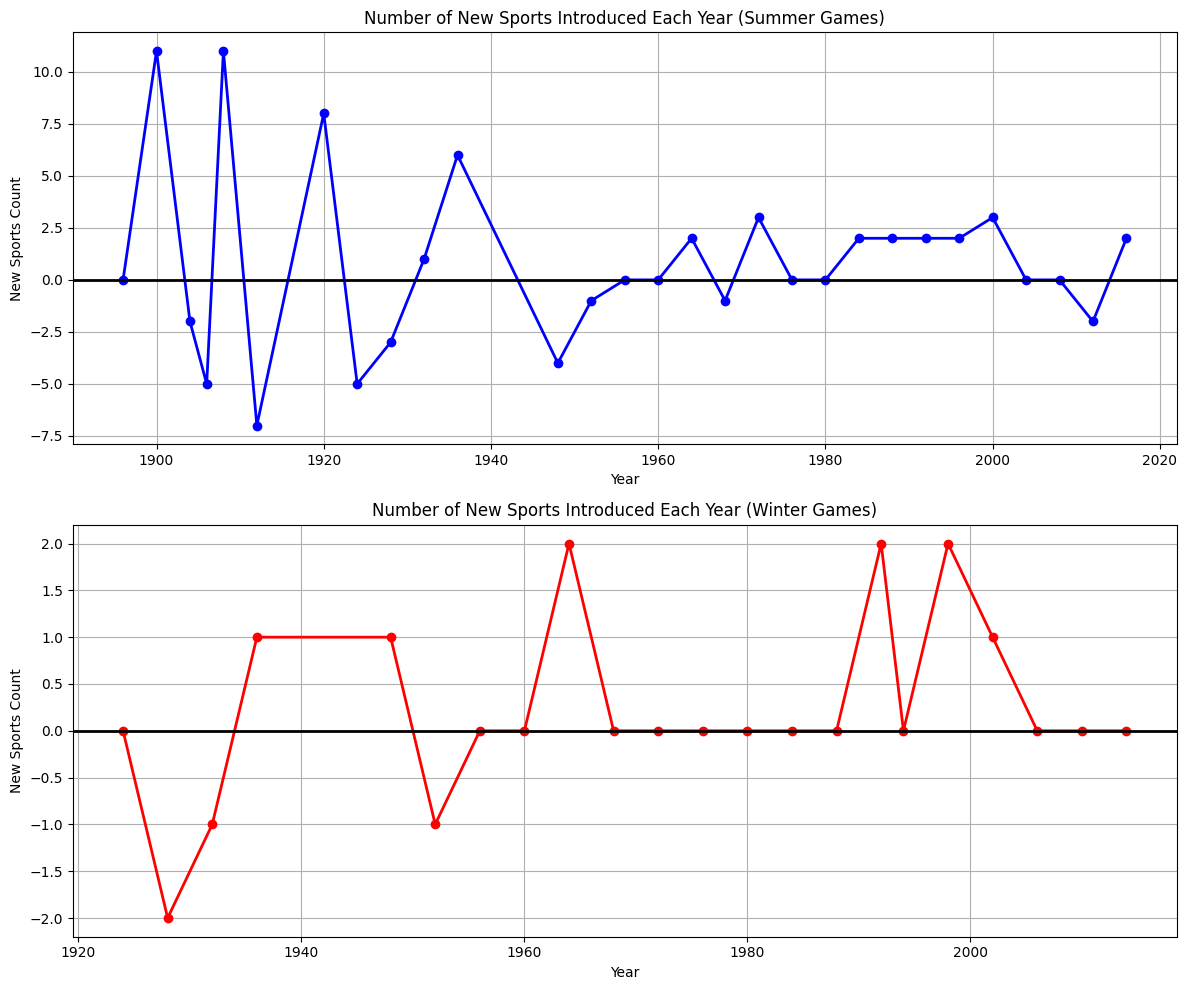

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



summer_df = df[df['Season'] == 'Summer']


winter_df = df[df['Season'] == 'Winter']


def calculate_new_sports_per_year(data):
    unique_sports_per_year = data.groupby('Year')['Sport'].nunique().reset_index()
    unique_sports_per_year.columns = ['Year', 'Unique_Sports']
    unique_sports_per_year['New_Sports'] = unique_sports_per_year['Unique_Sports'].diff().fillna(0).astype(int)
    return unique_sports_per_year


new_sports_summer = calculate_new_sports_per_year(summer_df)


new_sports_winter = calculate_new_sports_per_year(winter_df)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(new_sports_summer['Year'], new_sports_summer['New_Sports'], marker='o', linestyle='-', color='b', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax1.set_title('Number of New Sports Introduced Each Year (Summer Games)')
ax1.set_xlabel('Year')
ax1.set_ylabel('New Sports Count')
ax1.grid(True)


ax2.plot(new_sports_winter['Year'], new_sports_winter['New_Sports'], marker='o', linestyle='-', color='r', linewidth=2)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax2.set_title('Number of New Sports Introduced Each Year (Winter Games)')
ax2.set_xlabel('Year')
ax2.set_ylabel('New Sports Count')
ax2.grid(True)

plt.tight_layout()

plt.show()


<ipython-input-29-b3850c62e59f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Sport', y='Age', ci='sd')


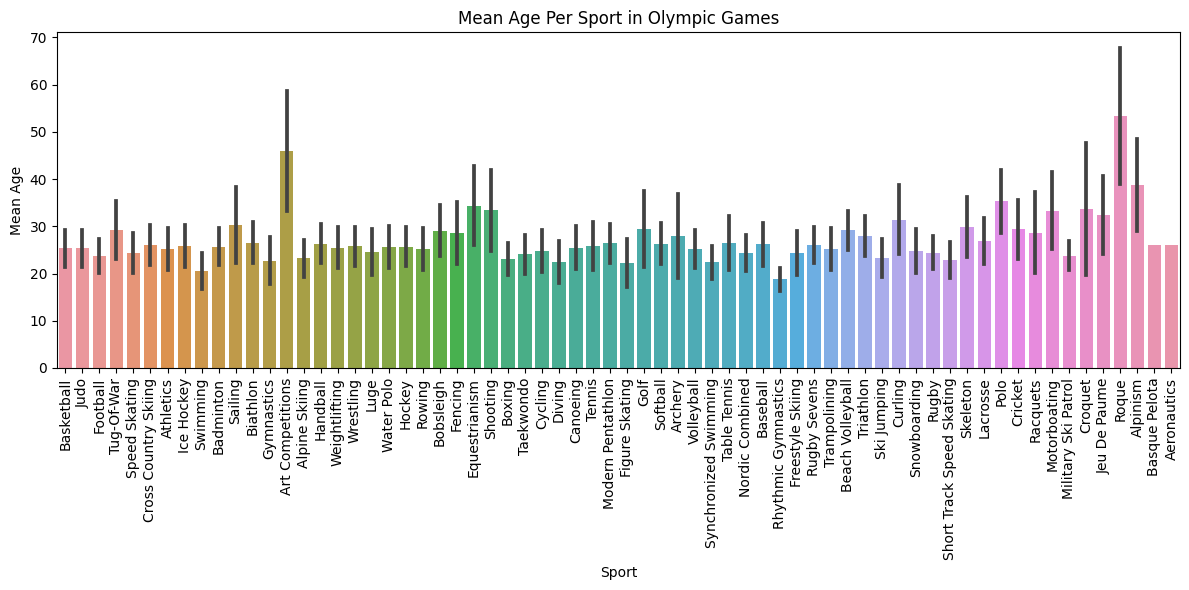

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Sport', y='Age', ci='sd')
plt.title('Mean Age Per Sport in Olympic Games')
plt.xlabel('Sport')
plt.ylabel('Mean Age')
plt.xticks(rotation=90)
plt.tight_layout()


plt.show()


Text(0, 0.5, 'Count')

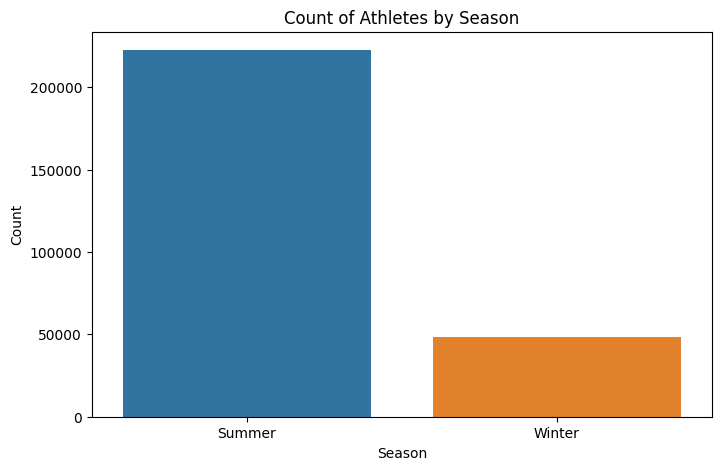

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Season')
plt.title('Count of Athletes by Season')
plt.xlabel('Season')
plt.ylabel('Count')

<ipython-input-35-78edc50897bf>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=weight_df, x='Sport', y='Weight', palette='viridis')


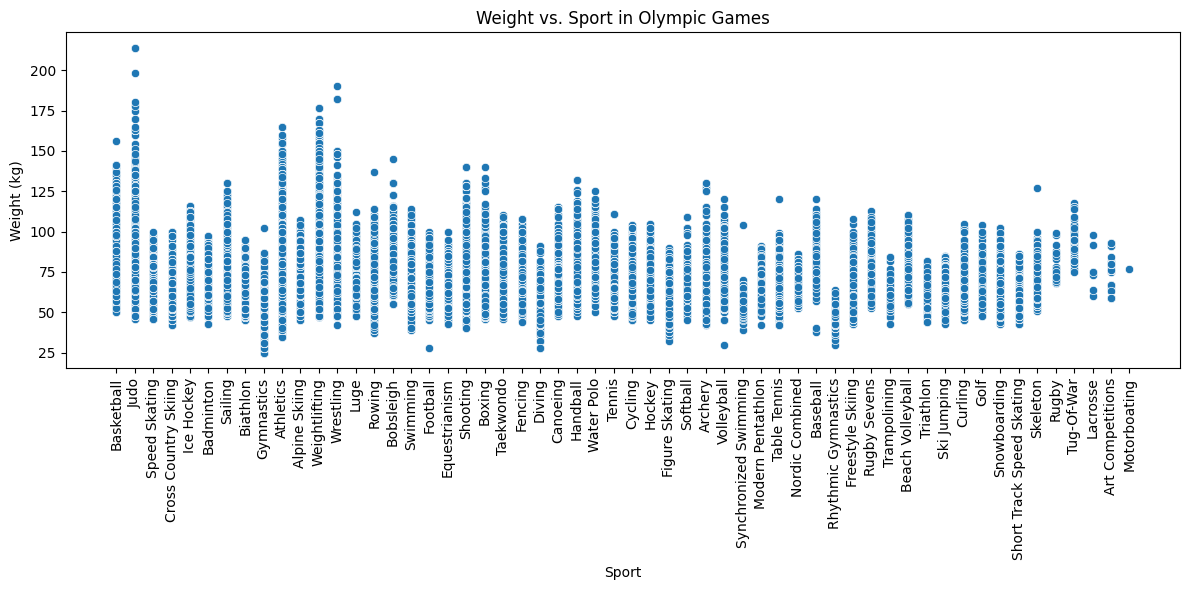

In [ ]:

weight_df = df[df['Weight'].notnull()]


plt.figure(figsize=(12, 6))
sns.scatterplot(data=weight_df, x='Sport', y='Weight', palette='viridis')
plt.title('Weight vs. Sport in Olympic Games')
plt.xlabel('Sport')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


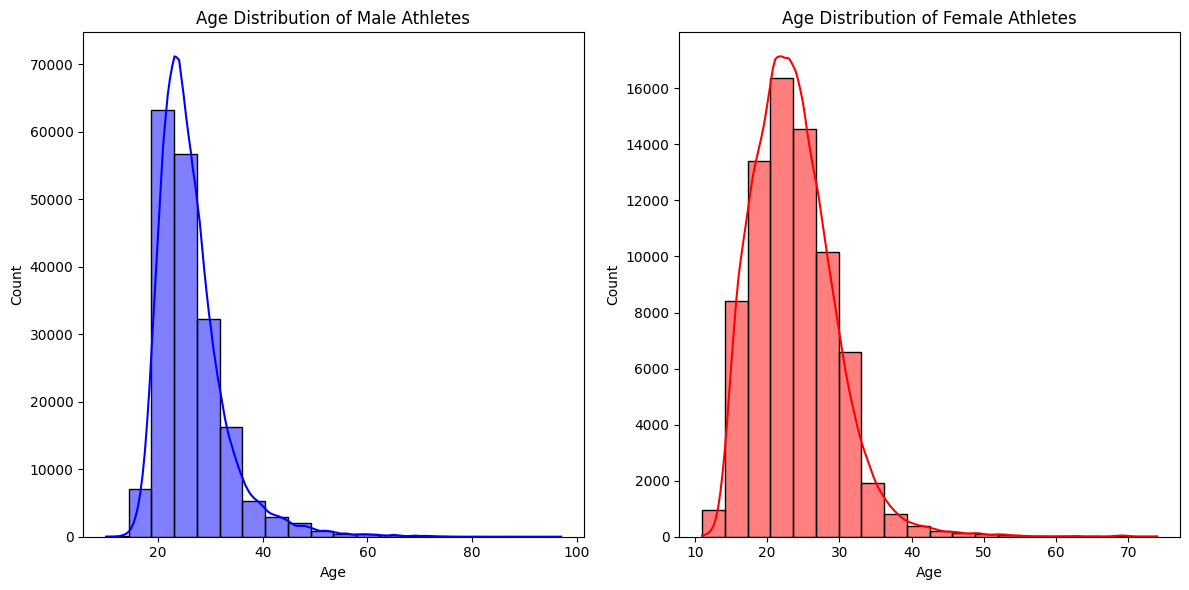

In [ ]:

male_athletes = df[df['Sex'] == 'M']
female_athletes = df[df['Sex'] == 'F']

# Create subplots for age distribution by gender
plt.figure(figsize=(12, 6))

# Histogram for male athletes
plt.subplot(1, 2, 1)
sns.histplot(data=male_athletes, x='Age', bins=20, kde=True, color='blue')
plt.title('Age Distribution of Male Athletes')
plt.xlabel('Age')
plt.ylabel('Count')

# Histogram for female athletes
plt.subplot(1, 2, 2)
sns.histplot(data=female_athletes, x='Age', bins=20, kde=True, color='red')
plt.title('Age Distribution of Female Athletes')
plt.xlabel('Age')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


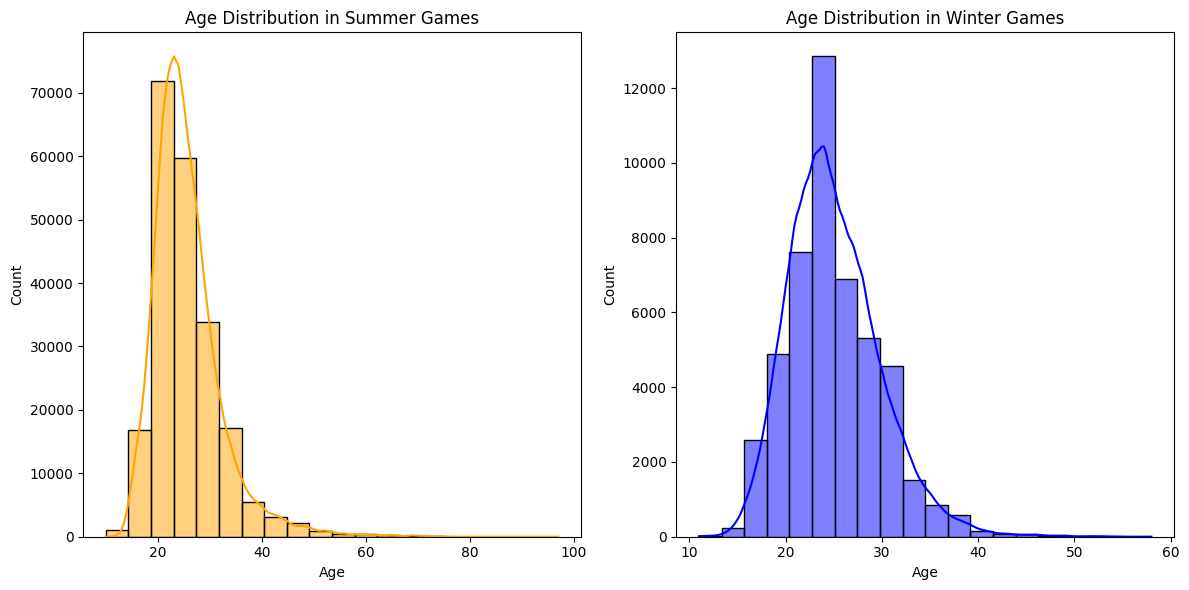

In [ ]:

summer_df = df[df['Season'] == 'Summer']

# Filter the dataset for Winter Games
winter_df = df[df['Season'] == 'Winter']

# Create subplots for age distribution by season
plt.figure(figsize=(12, 6))

# Histogram for Summer Games
plt.subplot(1, 2, 1)
sns.histplot(data=summer_df, x='Age', bins=20, kde=True, color='orange')
plt.title('Age Distribution in Summer Games')
plt.xlabel('Age')
plt.ylabel('Count')

# Histogram for Winter Games
plt.subplot(1, 2, 2)
sns.histplot(data=winter_df, x='Age', bins=20, kde=True, color='blue')
plt.title('Age Distribution in Winter Games')
plt.xlabel('Age')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
